## Model Version 7

In [39]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("final.df.csv")
df.shape

(200000, 80)

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
df.describe()
# need to check (distribution extreme.. check after initial modeling) :  
#    dti, total_rec_late_fee, recoveries, tot_coll_amt, mths_since_rcnt_il, il_util, max_bal_bc, avg_cur_bal,
#    delinq_amnt, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mths_since_recent_revol_delinq, tax_liens

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,fico_range_mean,sub_grade_num,emp_length_num
count,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,14740.615375,14.047924,445.564543,7.432490e+04,18.931042,0.326485,0.694805,38.589950,11.683355,0.226445,1.590229e+04,52.740852,24.888360,12636.221310,2478.097381,2.624044,560.785900,3799.395097,641.761105,610.148025,0.018800,0.005245,230.022100,1.334342e+05,1.050920,2.714855,0.873715,1.915005,19.761910,3.351007e+04,70.205415,1.262295,2.713755,5505.012450,61.995210,3.119424e+04,1.167065,1.669000,2.407435,4.898570,12652.200355,9305.872275,61.043219,0.008975,16.915020,123.496620,177.572560,12.592685,7.572270,1.583020,23.051050,7.020060,41.13807,0.522660,3.702345,4.719860,7.997870,5.726970,0.003425,0.088390,2.271730,94.162227,46.697567,0.142080,0.054800,20540.207830,695.489473,12.822720,5.946410
std,8752.102580,4.954058,262.118049,7.020791e+04,11.675555,0.886051,0.964933,21.663606,5.529451,0.631672,2.076584e+04,24.399791,12.065927,9763.746055,2626.966900,13.561922,1410.832467,6281.502295,89.661439,169.790827,0.152829,0.079168,1775.613015,1.492501e+05,1.189981,2.953508,1.056642,2.005857,25.708152,4.046119e+04,23.289368,1.358994,2.337575,5174.260522,19.674457,3.094635e+04,1.683867,2.932574,2.615008,3.280455,15288.478032,14277.046880,28.251856,0.104616,943.077677,53.847389,94.626771,15.829046,8.539039,1.974375,30.106178,6.059382,21.84772,1.333422,2.268906,2.960616,4.750692,3.267695,0.062636,0.485539,1.894223,8.728537,36.143285,0.386451,0.436312,20559.740281,30.408820,6.669401,3.699005
min,500.000000,5.310000,14.010000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000,0.000000,0.000000,0.000000,0.00

### Extreme outlier

In [4]:
from sklearn.preprocessing import LabelEncoder
df_plot = df
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df_plot['loan_status'])
df_plot['loan_status'] = label_encoder.transform(df_plot['loan_status'])

shape of data(dti>=600) : (10, 80)


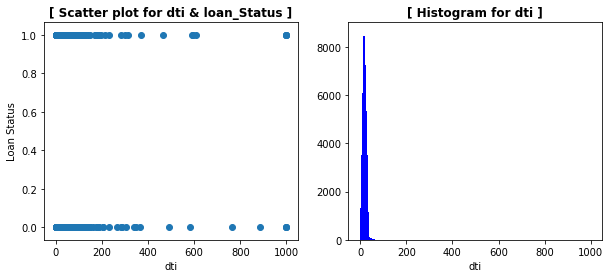

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

##### "dti" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ Scatter plot for dti & loan_Status ]', fontweight="bold")
plt.scatter('dti', 'loan_status', data=df_plot)
plt.xlabel('dti')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['dti'], bins=1000, color="blue")
plt.title('[ Histogram for dti ]', fontweight="bold")
plt.xlabel('dti')

df.dti.unique().shape
print('shape of data(dti>=600) :', df[df['dti'] >= 600].shape)

shape of data(total_rec_late_fee>=500) : (5, 80)


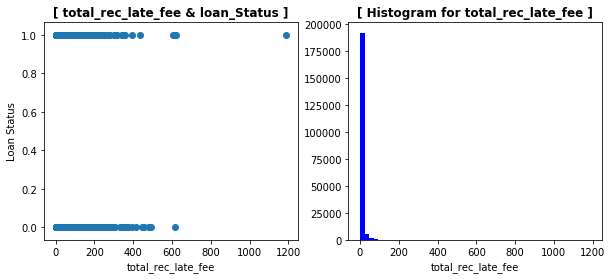

In [6]:
##### "total_rec_late_fee" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ total_rec_late_fee & loan_Status ]', fontweight="bold")
plt.scatter('total_rec_late_fee', 'loan_status', data=df_plot)
plt.xlabel('total_rec_late_fee')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['total_rec_late_fee'], bins=50, color="blue")
plt.title('[ Histogram for total_rec_late_fee ]', fontweight="bold")
plt.xlabel('total_rec_late_fee')

df.dti.unique().shape
print('shape of data(total_rec_late_fee>=500) :', df[df['total_rec_late_fee'] >= 500].shape)

shape of data(tot_coll_amt>=100000) : (6, 80)


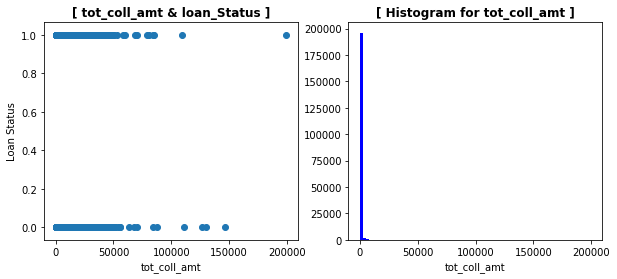

In [7]:
##### "tot_coll_amt" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ tot_coll_amt & loan_Status ]', fontweight="bold")
plt.scatter('tot_coll_amt', 'loan_status', data=df_plot)
plt.xlabel('tot_coll_amt')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['tot_coll_amt'], bins=80, color="blue")
plt.title('[ Histogram for tot_coll_amt ]', fontweight="bold")
plt.xlabel('tot_coll_amt')

df.dti.unique().shape
print('shape of data(tot_coll_amt>=100000) :', df[df['tot_coll_amt'] >= 100000].shape)

In [8]:
# outlier deletion :  dti (>=600, 10 counts)
print('before outlier(dti) removel : ', df.shape)
df = df[df['dti'] < 600]
print('after outlier(dti) removel : ', df.shape)

df = df[df['total_rec_late_fee'] < 500]
print('after outlier(total_rec_late_fee) removel : ', df.shape)

df = df[df['tot_coll_amt'] < 100000]
print('after outlier(tot_coll_amt) removel : ', df.shape)

before outlier(dti) removel :  (200000, 80)
after outlier(dti) removel :  (199990, 80)
after outlier(total_rec_late_fee) removel :  (199985, 80)
after outlier(tot_coll_amt) removel :  (199979, 80)


In [9]:
df = df.drop(['recoveries', 'last_pymnt_amnt','last_fico_range_high','last_fico_range_low','total_pymnt'], axis=1) 

### 'State' delete (Too many categories & Not important)

In [10]:
df = df.drop(['addr_state'], axis=1)

### dummification for categorical variables

In [11]:
print(df.dtypes.value_counts())

int64      52
float64    13
object      9
dtype: int64


In [12]:
x_old = df[df.columns.difference(['loan_status'])]
y = df[['loan_status']]

In [13]:
x = pd.get_dummies(x_old, drop_first=True)

## Modeling with Top 40 important Variables

In [14]:
## Top 40 variables
# addtional deletion : total_rec_int, total_rec_late_fee
top40_var = ['installment','loan_amnt','int_rate','debt_settlement_flag_Y',
'term_ 60 months','annual_inc','mo_sin_old_rev_tl_op','sub_grade_num','dti','num_rev_tl_bal_gt_0','avg_cur_bal',
'total_rev_hi_lim','bc_open_to_buy','fico_range_mean','total_bc_limit','acc_open_past_24mths',
'home_ownership_RENT','tot_cur_bal','mort_acc','open_rv_24m',
             
'total_acc','grade_D','mths_since_recent_inq','max_bal_bc','revol_bal','mo_sin_old_il_acct','revol_util',
'bc_util','total_bal_il','mths_since_rcnt_il','open_acc_6m','il_util','mths_since_last_delinq',
'percent_bc_gt_75','inq_last_6mths','all_util','mths_since_recent_bc','verification_status_Verified',
'purpose_small_business','home_ownership_MORTGAGE']

In [15]:
x = x[top40_var]

### x,y split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### 1. Logistic Regression

In [19]:
log = LogisticRegression()

log.fit(x_train, y_train)

print('training prediction accuracy :  %.2f' % log.score(x_train, y_train))
print('test prediction accuracy :  %.2f' % log.score(x_test, y_test))
print('** test pred (initial model) : ', 0.69)

training prediction accuracy :  0.66
test prediction accuracy :  0.66
** test pred (initial model) :  0.69


In [20]:
## same logic (for checking)
lr_log = LogisticRegression()
lr_log.fit(x_train, y_train)
lr_pred = lr_log.predict(x_test)

print('logistic regression accuracy : %.2f' % accuracy_score(y_test, lr_pred))
print('** test pred (initial model) : ', 0.69)

logistic regression accuracy : 0.66
** test pred (initial model) :  0.69


In [21]:
test_pred_prob = lr_log.predict_proba(x_test)
print(roc_auc_score(y_test, test_pred_prob[:,1]))
print('** test pred (initial model) : ', 0.747396965817424)

0.7135100439320061
** test pred (initial model) :  0.747396965817424


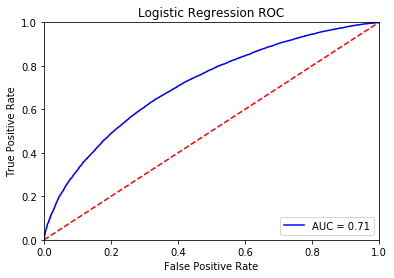

In [22]:
# calculate the fpr and tpr for all thresholds of the classification
lr_test_pred_prob = lr_log.predict_proba(x_test)
lr_preds = lr_test_pred_prob[:,1]
lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(y_test, lr_preds)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

# method I: plt
plt.title('Logistic Regression ROC')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2. Random Forest

#### * Before Tuning

In [23]:
start_time = time.time()

rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print('rf accuracy : {0:.4f}' .format(accuracy))
print('** accuracy (initial model) : ', 0.6685)
print('RF running time : {0:.1f} seconds '.format(time.time()-start_time))

rf accuracy : 0.6469
** accuracy (initial model) :  0.6685
RF running time : 10.6 seconds 


#### * Hyper Parameter tuning 

In [24]:
start_time = time.time()

rf2_clf = RandomForestClassifier(random_state=1)
rf_params = {
    'n_estimators': [100,300],    
    'max_depth': [6,8,10],
    'min_samples_leaf': [8,12,18],
    'min_samples_split': [8,12,18],
    "random_state": [1]
}

# GridSearchCV
rf_grid_cv = GridSearchCV(rf2_clf, param_grid=rf_params, cv=5)
rf_grid_cv.fit(x_train,y_train)

print('best parameter:\n', rf_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(rf_grid_cv.best_score_))

best parameter:
 {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 300, 'random_state': 1}
best prediction accuracy: 0.6827


In [25]:
### prediction by best param (auto)
rf3_pred = rf_grid_cv.best_estimator_.predict(x_test)

print('rf3 accuracy : {0:.4f}' .format(accuracy_score(y_test, rf3_pred)))
print('** accuracy (initial model) : ', 0.7011)
print('RF tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

rf3 accuracy : 0.6844
** accuracy (initial model) :  0.7011
RF tuning & running time : 23295.4 seconds 


In [26]:
### test with best param + n_estimators increase (Pre-determined params,...)
rf3_clf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                                min_samples_split=8, random_state=1)
rf3_clf.fit(x_train, y_train)
rf3_pred = rf3_clf.predict(x_test)

print('rf3 accuracy : {0:.4f}' .format(accuracy_score(y_test, rf3_pred)))
print('** accuracy (initial model) : ', 0.7011)

rf3 accuracy : 0.6849
** accuracy (initial model) :  0.7011


In [27]:
rf_test_pred_prob = rf3_clf.predict_proba(x_test)
print('rf ROC_AUC Score :', roc_auc_score(y_test, rf_test_pred_prob[:,1]))

rf ROC_AUC Score : 0.7528360637783812


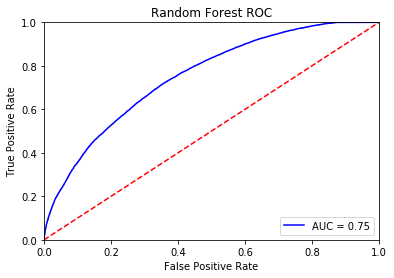

In [28]:
# calculate the fpr and tpr for all thresholds of the classification
rf_test_pred_prob = rf3_clf.predict_proba(x_test)
rf_preds = rf_test_pred_prob[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

# method I: plt
plt.title('Random Forest ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

debt_settlement_flag_Y    0.247266
sub_grade_num             0.200338
int_rate                  0.162013
term_ 60 months           0.077196
fico_range_mean           0.034389
dti                       0.027264
avg_cur_bal               0.019785
loan_amnt                 0.015419
installment               0.015056
grade_D                   0.014087
bc_open_to_buy            0.013557
tot_cur_bal               0.013232
acc_open_past_24mths      0.012603
annual_inc                0.012100
mort_acc                  0.009555
open_rv_24m               0.009128
total_bc_limit            0.007839
mo_sin_old_rev_tl_op      0.007767
max_bal_bc                0.006920
total_rev_hi_lim          0.006564
dtype: float64


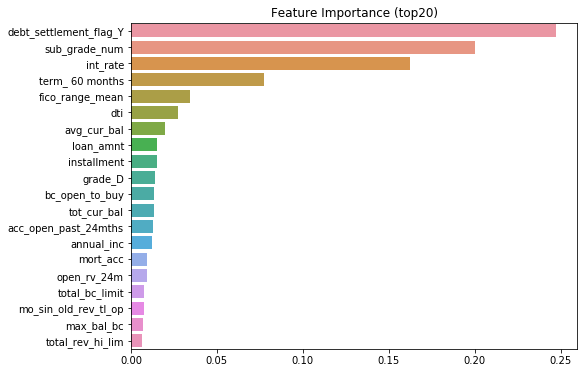

In [29]:
rf_feature_imp = rf3_clf.feature_importances_
rf_feature_imp = pd.Series(rf_feature_imp, index=x_train.columns)
rf_feature_top20 = rf_feature_imp.sort_values(ascending=False)[:20]
rf_feature_top40_rf = rf_feature_imp.sort_values(ascending=False)[:40]

print(rf_feature_top20)

plt.figure(figsize=(8,6))
plt.title('Feature Importance (top20)')
sns.barplot(x=rf_feature_top20, y=rf_feature_top20.index)
plt.show()

In [ ]:
import dill
dill.dump_session('session_model_v7.db')  ## Save in the middle of the process

### 3. GBM

#### * Before Tuning

In [31]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('gbm accuracy : {0:.4f}'.format(accuracy))
print('** accuracy (initial model) : ', 0.6685)
print('gbm running time : {0:.1f} seconds '.format(time.time()-start_time))

gbm accuracy : 0.6469
** accuracy (initial model) :  0.6685
gbm running time : 64.1 seconds 


#### * Hyper Parameter tuning

In [ ]:
start_time = time.time()

gb2_clf = GradientBoostingClassifier(random_state=1)
gb_params = {
    'n_estimators': [100,300],    
    'max_depth': [6,8,10],
    'min_samples_leaf': [8,12],
    'min_samples_split': [8,12],
    'learning_rate': [0.05, 0.1]
}

gb_grid_cv = GridSearchCV(gb2_clf, param_grid=gb_params, cv=10, verbose=1)
gb_grid_cv.fit(x_train, y_train)

print('best parameter:\n', gb_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(gb_grid_cv.best_score_))

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
### test with best param 
gb3_pred = gb_grid_cv.best_estimator_.predict(x_test)
gb3_accuracy = accuracy_score(y_test, gb3_pred)

print('GBM accuracy(After tuning) : {0:.4f}' .format(gb3_accuracy))
print('GBM tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

In [ ]:
gb_test_pred_prob = gb_grid_cv.predict_proba(x_test)
print('GBM ROC_AUC Score :', roc_auc_score(y_test, gb_test_pred_prob[:,1]))

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
GBM_test_pred_prob = gb_grid_cv.predict_proba(x_test)
GBM_preds = GBM_test_pred_prob[:,1]
GBM_fpr, GBM_tpr, GBM_threshold = metrics.roc_curve(y_test, GBM_preds)
GBM_roc_auc = metrics.auc(GBM_fpr, GBM_tpr)

# method I: plt
plt.title('GBM ROC')
plt.plot(GBM_fpr, GBM_tpr, 'b', label = 'AUC = %0.2f' % GBM_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
gb_feature_imp = gb_grid_cv.best_estimator_.feature_importances_
gb_feature_imp = pd.Series(gb_feature_imp, index=x_train.columns)
gb_feature_top20 = gb_feature_imp.sort_values(ascending=False)[:20]
gb_feature_top40 = gb_feature_imp.sort_values(ascending=False)[:40]
print(gb_feature_top20)

plt.figure(figsize=(8,6))
plt.title('gb_Feature Importance (top20)')
sns.barplot(x=gb_feature_top20, y=gb_feature_top20.index)
plt.show()

### 4. XGBoost

In [17]:
start_time = time.time()

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train_xgb = label_encoder.transform(y_train)

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_test)
y_test_xgb = label_encoder.transform(y_test)

In [18]:
dtrain = xgb.DMatrix(data=x_train, label=y_train_xgb)
dtest = xgb.DMatrix(data=x_test, label=y_test_xgb)

In [19]:
xgb_params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 
              'early_stoppings':100}
num_rounds = 400

In [20]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = xgb_params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-logloss:0.676816	eval-logloss:0.67687
[1]	train-logloss:0.663407	eval-logloss:0.663677
[2]	train-logloss:0.652234	eval-logloss:0.652501
[3]	train-logloss:0.642934	eval-logloss:0.643286
[4]	train-logloss:0.634932	eval-logloss:0.635362
[5]	train-logloss:0.628223	eval-logloss:0.62872
[6]	train-logloss:0.622503	eval-logloss:0.623078
[7]	train-logloss:0.617576	eval-logloss:0.618299
[8]	train-logloss:0.613397	eval-logloss:0.614089
[9]	train-logloss:0.609736	eval-logloss:0.610496
[10]	train-logloss:0.606632	eval-logloss:0.607452
[11]	train-logloss:0.603845	eval-logloss:0.604706
[12]	train-logloss:0.601486	eval-logloss:0.602388
[13]	train-logloss:0.599336	eval-logloss:0.600266
[14]	train-logloss:0.597241	eval-logloss:0.598267
[15]	train-logloss:0.595585	eval-logloss:0.596666
[16]	train-logloss:0.593926	eval-logloss:0.59508
[17]	train-logloss:0.592553	eval-logloss:0.59379
[18]	train-logloss:0.591215	eval-logloss:0.592452
[19]	train-logloss:0.590086	eval-logloss:0.591404
[20]	train-log

[164]	train-logloss:0.564542	eval-logloss:0.568985
[165]	train-logloss:0.564495	eval-logloss:0.56895
[166]	train-logloss:0.564435	eval-logloss:0.568912
[167]	train-logloss:0.564388	eval-logloss:0.56889
[168]	train-logloss:0.564347	eval-logloss:0.568885
[169]	train-logloss:0.564286	eval-logloss:0.568853
[170]	train-logloss:0.564238	eval-logloss:0.568831
[171]	train-logloss:0.564208	eval-logloss:0.568823
[172]	train-logloss:0.564147	eval-logloss:0.568753
[173]	train-logloss:0.56409	eval-logloss:0.568718
[174]	train-logloss:0.564049	eval-logloss:0.568709
[175]	train-logloss:0.564001	eval-logloss:0.56867
[176]	train-logloss:0.563964	eval-logloss:0.568668
[177]	train-logloss:0.56392	eval-logloss:0.568645
[178]	train-logloss:0.563874	eval-logloss:0.568635
[179]	train-logloss:0.563811	eval-logloss:0.568601
[180]	train-logloss:0.563769	eval-logloss:0.568567
[181]	train-logloss:0.563719	eval-logloss:0.568548
[182]	train-logloss:0.563682	eval-logloss:0.568536
[183]	train-logloss:0.563657	eval-lo

[326]	train-logloss:0.558503	eval-logloss:0.566638
[327]	train-logloss:0.558475	eval-logloss:0.566634
[328]	train-logloss:0.558434	eval-logloss:0.566612
[329]	train-logloss:0.558404	eval-logloss:0.566593
[330]	train-logloss:0.558364	eval-logloss:0.566554
[331]	train-logloss:0.558327	eval-logloss:0.566557
[332]	train-logloss:0.558296	eval-logloss:0.566548
[333]	train-logloss:0.558286	eval-logloss:0.566542
[334]	train-logloss:0.558264	eval-logloss:0.566553
[335]	train-logloss:0.558243	eval-logloss:0.566554
[336]	train-logloss:0.558209	eval-logloss:0.56655
[337]	train-logloss:0.558187	eval-logloss:0.566547
[338]	train-logloss:0.558157	eval-logloss:0.566539
[339]	train-logloss:0.558106	eval-logloss:0.566502
[340]	train-logloss:0.55806	eval-logloss:0.566473
[341]	train-logloss:0.558025	eval-logloss:0.566469
[342]	train-logloss:0.557994	eval-logloss:0.56646
[343]	train-logloss:0.557964	eval-logloss:0.566461
[344]	train-logloss:0.557951	eval-logloss:0.566456
[345]	train-logloss:0.557933	eval-

In [21]:
pred_probs = xgb_model.predict(dtest)
xgb_preds = [1 if x>0.5 else 0 for x in pred_probs]

In [22]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test_xgb, pred)
    accuracy = accuracy_score(y_test_xgb , pred)
    precision = precision_score(y_test_xgb , pred)
    recall = recall_score(y_test_xgb , pred)
    print('confusion matrix')
    print(confusion)
    print('XGBoost Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy , precision ,recall))

In [23]:
get_clf_eval(y_test_xgb, xgb_preds)
print('** accuracy (initial model) : ', 'Accuracy: 0.7345, Precision: 0.7293, Recall: 0.8045')
print('XGBoost running time : {0:.1f} seconds '.format(time.time()-start_time))

confusion matrix
[[11208  7393]
 [ 5012 16383]]
XGBoost Accuracy: 0.6898, Precision: 0.6891, Recall: 0.7657
** accuracy (initial model) :  Accuracy: 0.7345, Precision: 0.7293, Recall: 0.8045
XGBoost running time : 59.8 seconds 


In [24]:
xgb_model.get_score(importance_type='weight')

{'sub_grade_num': 74,
 'debt_settlement_flag_Y': 83,
 'term_ 60 months': 54,
 'int_rate': 179,
 'avg_cur_bal': 83,
 'installment': 122,
 'dti': 110,
 'mort_acc': 26,
 'fico_range_mean': 58,
 'home_ownership_RENT': 20,
 'home_ownership_MORTGAGE': 7,
 'open_rv_24m': 26,
 'acc_open_past_24mths': 59,
 'annual_inc': 128,
 'tot_cur_bal': 57,
 'mths_since_recent_inq': 45,
 'num_rev_tl_bal_gt_0': 72,
 'loan_amnt': 115,
 'mo_sin_old_rev_tl_op': 134,
 'max_bal_bc': 51,
 'open_acc_6m': 29,
 'verification_status_Verified': 21,
 'total_bc_limit': 52,
 'purpose_small_business': 22,
 'mths_since_recent_bc': 70,
 'total_acc': 89,
 'total_bal_il': 62,
 'bc_open_to_buy': 56,
 'mths_since_last_delinq': 77,
 'total_rev_hi_lim': 58,
 'all_util': 70,
 'mo_sin_old_il_acct': 91,
 'revol_bal': 97,
 'revol_util': 54,
 'percent_bc_gt_75': 24,
 'inq_last_6mths': 33,
 'bc_util': 77,
 'mths_since_rcnt_il': 61,
 'il_util': 54,
 'grade_D': 3}

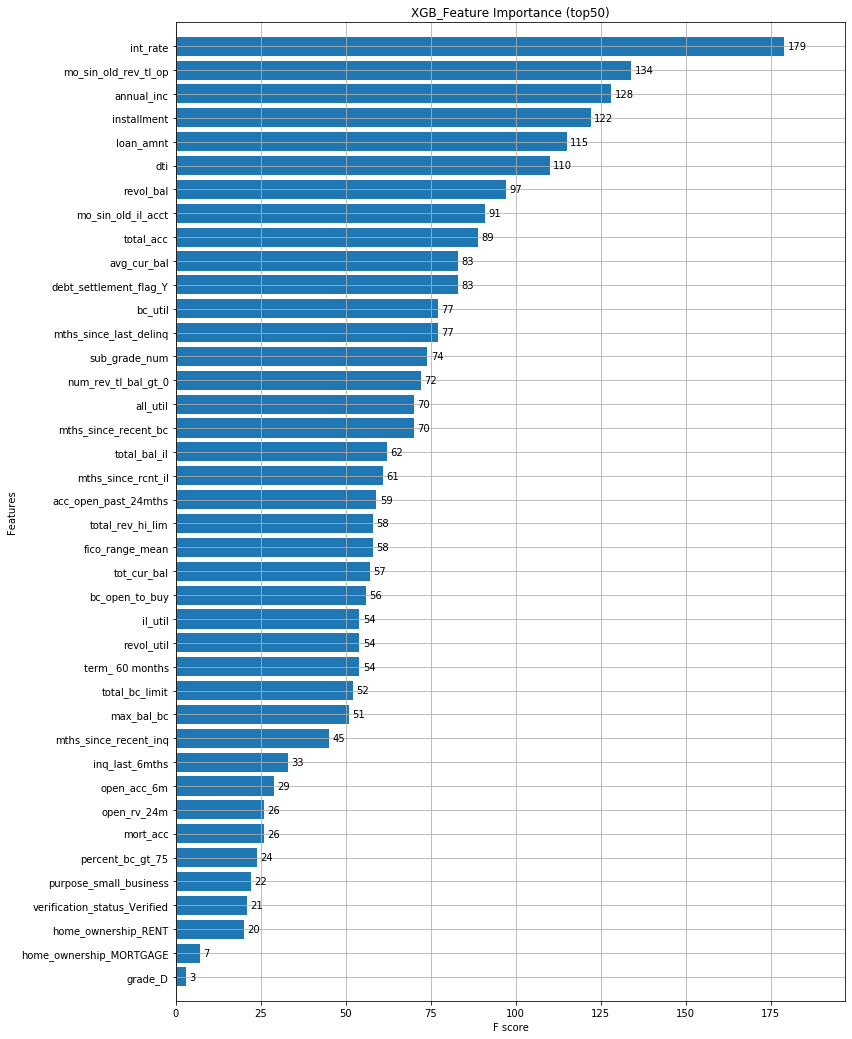

In [25]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.8, ax=ax)
plt.title('XGB_Feature Importance (top50)')
plt.show()

### 5. SVM (SVC)

In [30]:
start_time = time.time()

n_estimators = 10
svm_clf = LinearSVC(random_state=1)
svm_clf.fit(x_train, y_train)
svm_pred = svm_clf.predict(x_test)

print('SVM train score : {0:.1f} seconds ', svm_clf.score(x_train, y_train))
print('SVM pred test score : {0:.1f} seconds ', svm_clf.score(x_test, y_test))

SVM train score : {0:.1f} seconds  0.4609989811417463
SVM pred test score : {0:.1f} seconds  0.4657215721572157


#### * Hyper Parameter tuning

In [31]:
start_time = time.time()

svm2_clf = LinearSVC(random_state=1)
svm_params = {'C': [1, 10, 100, 1000]}

# GridSearchCV
svm_grid_cv = GridSearchCV(svm2_clf, param_grid=svm_params, cv=5)
svm_grid_cv.fit(x_train,y_train)
svm2_pred = svm_grid_cv.predict(x_test)

print('SVM best parameter:\n', svm_grid_cv.best_params_)
print('SVM best prediction accuracy: {0:.4f}'.format(svm_grid_cv.best_score_))
print('SVM best prediction for test accuracy: {0:.4f}' .format(accuracy_score(y_test, svm2_pred)))
print('SVM tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

SVM best parameter:
 {'C': 1}
SVM best prediction accuracy: 0.5354
SVM best prediction for test accuracy: 0.4657
SVM tuning & running time : 1293.5 seconds 


In [32]:
# svm_test_pred_prob = svm_grid_cv.predict_proba(x_test)
# print('SVM ROC_AUC Score :', roc_auc_score(y_test, svm_test_pred_prob[:,1]))

In [ ]:
svm_test_pred_prob = svm_grid_cv.predict_proba(x_test)
print(roc_auc_score(y_test, svm_test_pred_prob[:,1]))

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
svm_test_pred_prob = svm_grid_cv.predict_proba(x_test)
svm_preds = svm_test_pred_prob[:,1]
svm_fpr, svm_tpr, svm_threshold = metrics.roc_curve(y_test, svm_preds)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

# method I: plt
plt.title('SVM ROC')
plt.plot(svm_fpr, svm_tpr, 'b', label = 'AUC = %0.2f' % svm_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

                               0       abs
sub_grade_num          -0.015877  0.015877
int_rate               -0.011850  0.011850
dti                    -0.005738  0.005738
mths_since_recent_inq   0.005350  0.005350
acc_open_past_24mths   -0.004372  0.004372
open_rv_24m            -0.003258  0.003258
num_rev_tl_bal_gt_0    -0.001931  0.001931
open_acc_6m            -0.001295  0.001295
debt_settlement_flag_Y -0.001245  0.001245
mths_since_rcnt_il     -0.001103  0.001103
installment             0.001089  0.001089
il_util                -0.001054  0.001054
mths_since_recent_bc    0.000990  0.000990
percent_bc_gt_75       -0.000927  0.000927
mths_since_last_delinq  0.000916  0.000916
inq_last_6mths         -0.000869  0.000869
mort_acc                0.000845  0.000845
fico_range_mean         0.000778  0.000778
all_util               -0.000687  0.000687
total_acc               0.000643  0.000643


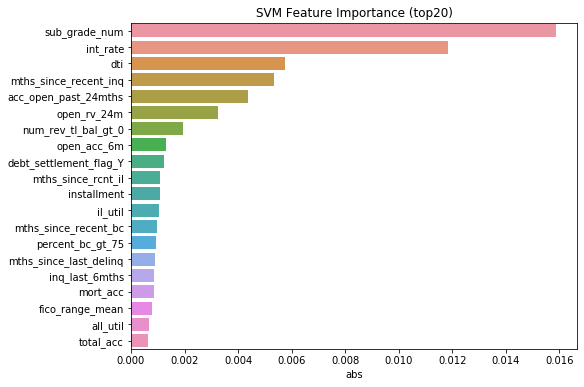

In [33]:
svm_feature_imp = pd.DataFrame(svm_grid_cv.best_estimator_.coef_, columns=x_train.columns).transpose()
svm_feature_imp['abs']=svm_feature_imp[0].apply(np.abs).round(6)
svm_feature_top20 = svm_feature_imp.sort_values(by= ['abs'], ascending=False)[:20]
svm_feature_top40 = svm_feature_imp.sort_values(by= ['abs'], ascending=False)[:40]

print(svm_feature_top20)

plt.figure(figsize=(8,6))
plt.title('SVM Feature Importance (top20)')
sns.barplot(x=svm_feature_top20['abs'], y=svm_feature_top20.index)
plt.show()

### 6. naive_bayes (GaussianNB)

In [36]:
start_time = time.time()

gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train)
gnb_pred = gnb_clf.predict(x_test)

# Evaluate accuracy
print('naive_bayes prediction accuracy: : {0:.4f}', accuracy_score(y_test, gnb_pred))
print('Naive_bayes running time : {0:.1f} seconds '.format(time.time()-start_time))

naive_bayes prediction accuracy: : {0:.4f} 0.5843834383438344
Naive_bayes running time : 0.3 seconds 


### 7. Neural Net (Simple ver.)

In [40]:
start_time = time.time()

NN_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN_clf.fit(x_train, y_train)
NN_clf_pred = NN_clf.predict(x_test)

# Evaluate accuracy
print('NN Score prediction accuracy: : {0:.4f}',round(NN_clf.score(x_train,y_train), 4))
print('NN test prediction accuracy: : {0:.4f}', accuracy_score(y_test, NN_clf_pred))
print('Neural Net running time : {0:.1f} seconds '.format(time.time()-start_time))

NN Score prediction accuracy: : {0:.4f} 0.4604
NN test prediction accuracy: : {0:.4f} 0.46507150715071505
Neural Net running time : 0.6 seconds 


#### * Hyper Parameter tuning

In [ ]:
start_time = time.time()

NN2_clf = MLPClassifier(max_iter=100)
NN2_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

NN2_grid_cv = GridSearchCV(NN2_clf, param_grid=NN2_params, cv=5)
NN2_grid_cv.fit(x_train,y_train)
NN2_pred = NN2_grid_cv.predict(x_test)

print('Neural Net best parameter:\n', NN2_grid_cv.best_params_)
print('Neural Net best prediction accuracy: {0:.4f}'.format(NN2_grid_cv.best_score_))
print('Neural Net best prediction (test accuracy) : {0:.4f}' .format(accuracy_score(y_test, NN2_pred)))
print('Neural Net  tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

In [ ]:
nn_test_pred_prob = NN2_grid_cv.predict_proba(x_test)
print('NN ROC_AUC Score :', roc_auc_score(y_test, nn_test_pred_prob[:,1]))

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
NN_test_pred_prob = NN2_grid_cv.predict_proba(x_test)
NN_preds = NN_test_pred_prob[:,1]
NN_fpr, NN_tpr, NN_threshold = metrics.roc_curve(y_test, NN_preds)
NN_roc_auc = metrics.auc(NN_fpr, NN_tpr)

# method I: plt
plt.title('Neural Net ROC')
plt.plot(NN_fpr, NN_tpr, 'b', label = 'AUC = %0.2f' % NN_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# %matplotlib inline

# nn_feature_imp = NN2_grid_cv.best_estimator_.coefs_
# nn_feature_imp = pd.Series(NN2_grid_cv, index=x_train.columns)
# nn_feature_top20 = nn_feature_imp.sort_values(ascending=False)[:20]
# nn_feature_top40_svm = nn_feature_imp.sort_values(ascending=False)[:40]

# print(feature_top20)

# plt.figure(figsize=(8,6))
# plt.title('NN Feature Importance (top20)')
# sns.barplot(x=nn_feature_top20, y=nn_feature_top20.index)
# plt.show()

In [ ]:
print('RF\n', feature_top40_rf,'\n')
print('GBM\n', gb_feature_top40,'\n')
print('XGB\n', xgb_model.get_score(importance_type='weight'), '\n')
print('SVM', svm_feature_top40,'\n')
# print('NN\n', NN_feature_imp_top40,'\n')

In [ ]:
print('logistic regression accuracy : %.2f' % accuracy_score(y_test, lr_pred))
print('rf3 accuracy : {0:.4f}' .format(accuracy_score(y_test, rf3_pred)))
print('GBM accuracy(After tuning) : {0:.4f}' .format(gb3_accuracy))
get_clf_eval(y_test_xgb, xgb_preds)
print('SVM best prediction accuracy: {0:.4f}'.format(svm_grid_cv.best_score_))
print('SVM best prediction for test accuracy: : {0:.4f}' .format(accuracy_score(y_test, svm2_pred)))
print('naive_bayes prediction accuracy: : {0:.4f}', accuracy_score(y_test, gnb_pred))
#print('NN Score prediction accuracy: : {0:.4f}',round(NN_clf.score(x_train,y), 4))
print('NN test prediction accuracy: : {0:.4f}', accuracy_score(y_test, NN2_pred))

In [ ]:
import dill
dill.dump_session('session_model_v7.db')  ## Save

# import dill
# dill.load_session('session_model_v4.db')  ## Restore